In [1]:
import numpy as np
import math as mt
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
df=pd.read_csv('bigmartsales.csv')

In [12]:
#get summery of all variable in data sets
df.shape

(8523, 13)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [30]:


categorical_columns = df.select_dtypes(include=['object', 'category'])
categorical_columns 

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 2,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 2,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 2,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,NaN,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,NaN,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier1,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 2,Supermarket Type2


In [26]:
#infdormation about dadata

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [31]:
df.describe()
# item_weight and Item+visiblity has zero values so that needs to be fixed for things a zero item weight is not expected so this needs to be fixed 



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


In [33]:
df.describe(include = "object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,6473,8523
unique,1559,2,16,10,3,8,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 2,Supermarket Type1
freq,10,5517,1232,935,2793,2793,5577


In [39]:
df.isnull().values.any()


True

In [43]:

missing_values= df.isnull().sum()
missing_values

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

<Axes: >

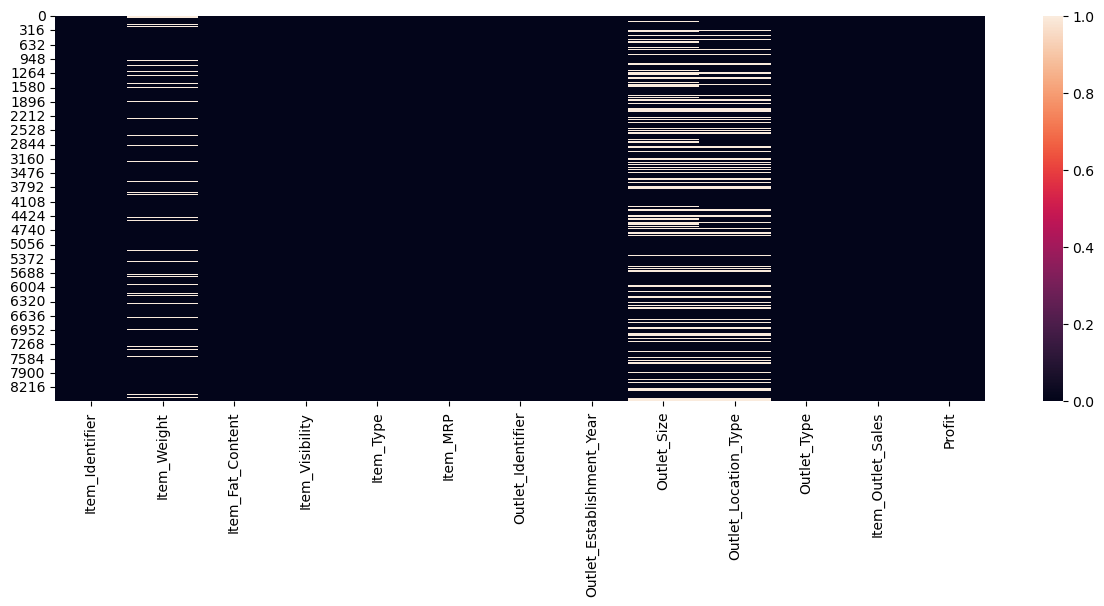

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())

In [64]:
missing_values=df.isnull().sum().sort_values(ascending=False)


In [65]:
missing_values

Outlet_Size                  2410
Outlet_Location_Type         2050
Item_Weight                   749
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

C:\Users\jitendra\AppData\Local\Temp\ipykernel_3376\1440297907.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(missing_values)


<Axes: ylabel='Density'>

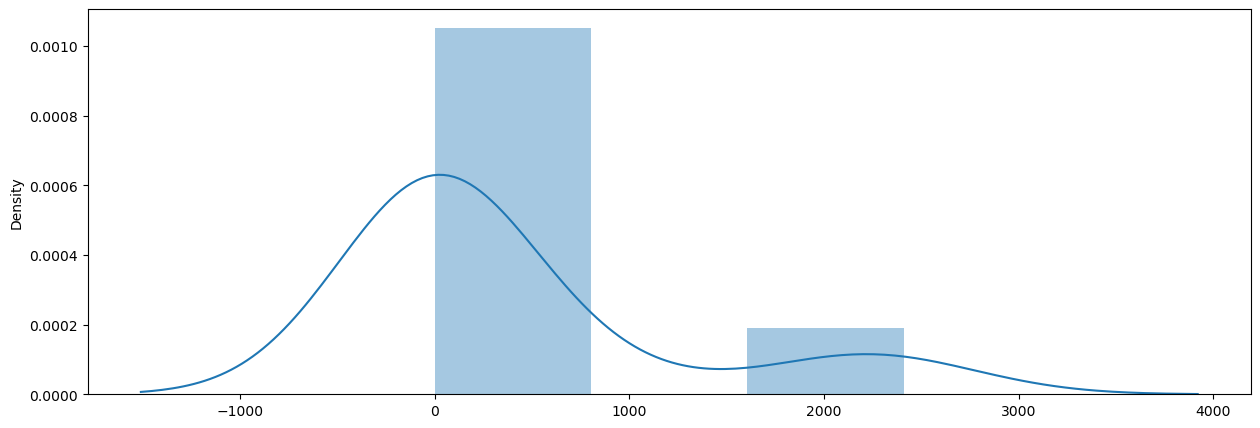

In [61]:
sns.distplot(missing_values)

In [69]:
percent = ((df.isnull().sum()/df.shape[0])*100)
percent

Item_Identifier               0.000000
Item_Weight                   8.787985
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type         24.052564
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Profit                        0.000000
dtype: float64

In [75]:
percent=percent.sort_values(ascending=True)
percent


In [76]:
total = df.isnull().sum().sort_values(ascending=False)

In [78]:
total

Outlet_Size                  2410
Outlet_Location_Type         2050
Item_Weight                   749
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [79]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [81]:
missing_data

,Total,Percent
Outlet_Size,2410,28.276428
Outlet_Location_Type,2050,24.052564
Item_Weight,749,8.787985
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000


In [82]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.930,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,14.1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.2,OUT045,2002,NaN,NaN,Supermarket Type1,549.2850,14.2
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,1193.1136,9.5
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1845.5976,14.2


In [104]:
total=df.isnull().sum().sort_values(ascending=False)
total

Outlet_Size                  2410
Outlet_Location_Type         2050
Item_Weight                   749
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [105]:
percent=(df.isnull().sum()/df.shape[0])*100
percent=percent.sort_values(ascending=False)
percent

Outlet_Size                  28.276428
Outlet_Location_Type         24.052564
Item_Weight                   8.787985
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Profit                        0.000000
dtype: float64

In [121]:
missing_data=pd.concat([total,percent], axis=1,keys=['total','percent'])
missing_data

,total,percent
Outlet_Size,2410,28.276428
Outlet_Location_Type,2050,24.052564
Item_Weight,749,8.787985
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000


In [125]:
missing_data['Type']=df[missing_data.index].dtypes
#missing_data['Type']=df[missing_data.index].dtypes

In [126]:
missing_data

,total,percent,Type
Outlet_Size,2410,28.276428,object
Outlet_Location_Type,2050,24.052564,object
Item_Weight,749,8.787985,float64
Item_Identifier,0,0.000000,object
Item_Fat_Content,0,0.000000,object
Item_Visibility,0,0.000000,float64
Item_Type,0,0.000000,object
Item_MRP,0,0.000000,float64
Outlet_Identifier,0,0.000000,object
Outlet_Establishment_Year,0,0.000000,int64
